# Workshop 14/2/23

### Import Package

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

## Question 1
The data in this file are from an experiment with 96 participants. We measured how quickly (in milliseconds) people could pronounce a word that was presented to them. Words were presented either normally (Condition A) or were visually degraded (Condition B). This was a between participants factor of visual quality with 2 levels. Visualise the data and report the key descriptives before then running the appropriate ANOVA.
Can you turn your code into a function called my_anova() so that you can call it with the command my_anova(https://raw.githubusercontent.com/ajstewartlang/02_intro_to_python_programming/main/data/ANOVA_class_work.csv) and will produce the output of your ANOVA? Hint: you need to pass just the location of your data file to your function, and can keep the code you’ve written above virtually unchanged.

In [2]:
# Read data

data_2 = pd.read_csv('https://raw.githubusercontent.com/ajstewartlang/02_intro_to_python_programming/main/data/ANOVA_class_work.csv')

In [3]:
# Mean and standard deviation done manually

group_data_2 = data_2.groupby(['condition'])['response_time']

group_data_2_mean = group_data_2.mean()

group_data_2_error = group_data_2.std()

print(group_data_2_mean)

print(group_data_2_error)

condition
condition_a    1002.229167
condition_b    1020.354167
Name: response_time, dtype: float64
condition
condition_a    21.045280
condition_b    23.524084
Name: response_time, dtype: float64


In [4]:
# Descriptives with preset function

group_data_2.describe()


,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
condition_a,48.0,1002.229167,21.045280,945.0,990.00,1003.5,1017.25,1040.0
condition_b,48.0,1020.354167,23.524084,970.0,1003.25,1021.0,1032.25,1075.0


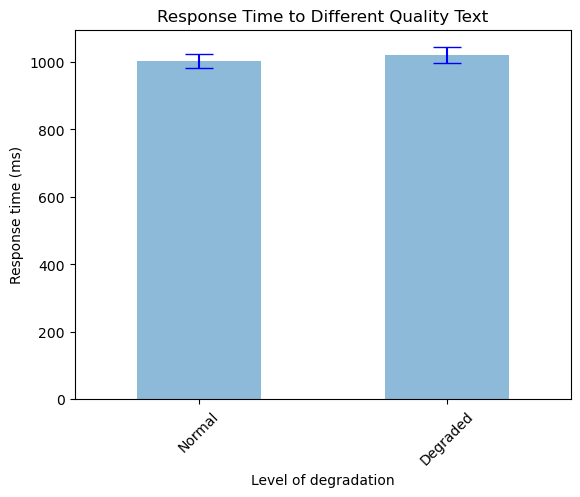

In [5]:
# Bar Chart

group_data_2_mean.plot.bar(yerr = group_data_2_error, alpha = .5, capsize = 10, ecolor = 'blue')
plt.xlabel('Level of degradation')
plt.ylabel('Response time (ms)')
plt.title('Response Time to Different Quality Text')
plt.xticks([0 , 1], ['Normal', 'Degraded'], rotation = 45)
plt.show()

In [6]:
# Create Masks

normal = data_2[data_2['condition'] == 'condition_a']['response_time']

degraded = data_2[data_2['condition'] == 'condition_b']['response_time']

In [7]:
# One-way ANOVA

stats.f_oneway(normal, degraded)

F_onewayResult(statistic=15.82752793841669, pvalue=0.00013639071462771327)

In [8]:
# One-way ANOVA second method

good_model = ols('response_time ~ condition', data = data_2).fit()

good_table = sm.stats.anova_lm(good_model, typ = 3)

print(good_table)


                 sum_sq    df             F         PR(>F)
Intercept  4.821424e+07   1.0  96787.913718  1.986229e-143
condition  7.884375e+03   1.0     15.827528   1.363907e-04
Residual   4.682546e+04  94.0           NaN            NaN


In [9]:
# Creating function

def anova(data):
    data_2 = pd.read_csv(data)
    good_model = ols('response_time ~ condition', data = data_2).fit()
    good_table = sm.stats.anova_lm(good_model, typ = 3)
    print(good_table.iat[1, 3])

anova('https://raw.githubusercontent.com/ajstewartlang/02_intro_to_python_programming/main/data/ANOVA_class_work.csv')

0.0001363907146277273


In [10]:
# Other ways to get values from a panda data frame

print(type(good_table))

print(good_table.loc['condition'])

print(good_table.iloc[0]) # for row indexed 0

<class 'pandas.core.frame.DataFrame'>
sum_sq    7884.375000
df           1.000000
F           15.827528
PR(>F)       0.000136
Name: condition, dtype: float64
sum_sq     4.821424e+07
df         1.000000e+00
F          9.678791e+04
PR(>F)    1.986229e-143
Name: Intercept, dtype: float64


## Question 2
Data: https://raw.githubusercontent.com/ajstewartlang/11_glm_anova_pt1/master/data/ANOVA_data2.csv

48 participants responded to a word that differed in how frequent it was. This factor is between participants and we have four levels coded as ‘very low’, ‘low’, ‘high’, and ‘very high’. Our DV is reaction time and is coded as ‘RT’. Subject number is coded as ‘Subject’. We want to know if there is a difference between our conditions (and if so, where that difference lies). Calculate descriptive statistics and conduct the appropriate ANOVA.

In [11]:
# Read data

data_3 = pd.read_csv('https://raw.githubusercontent.com/ajstewartlang/11_glm_anova_pt1/master/data/ANOVA_data2.csv')

In [12]:
# Mean and Standard Deviation

group_data_3 = data_3.groupby(['Condition'])['RT']

group_data_3_mean = group_data_3.mean()

group_data_3_error = group_data_3.std()

group_data_3_mean

Condition
high          927.083333
low          1164.666667
very high     612.666667
very low     1478.166667
Name: RT, dtype: float64

In [13]:
# Convert series into list for bar plot

error_3 = [group_data_3_error[0], group_data_3_error[1], group_data_3_error[2], group_data_3_error[3]]

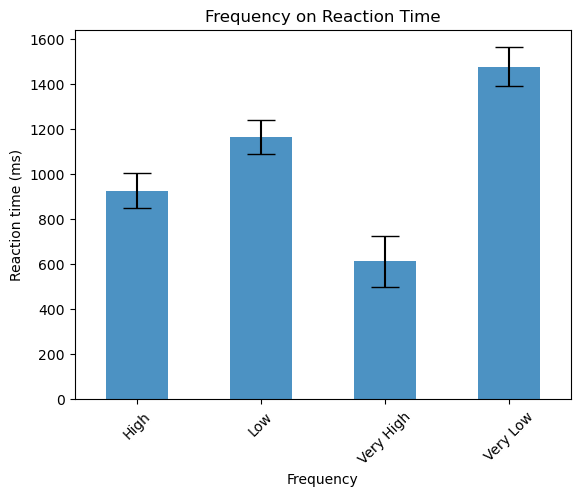

In [14]:
# Bar plot

group_data_3_mean.plot(kind = 'bar',
                      yerr = error_3,
                       capsize = 10,
                       alpha = .8
                      )
plt.xticks([0, 1, 2, 3], ['High', 'Low', 'Very High', 'Very Low'], rotation = 45)
plt.xlabel('Frequency')
plt.ylabel('Reaction time (ms)')
plt.title('Frequency on Reaction Time')
plt.show()

In [15]:
# Make masks

very_low = data_3[data_3['Condition'] == 'very low']['RT']

low = data_3[data_3['Condition'] == 'low']['RT']

high = data_3[data_3['Condition'] == 'high']['RT']

very_high = data_3[data_3['Condition'] == 'very high']['RT']

In [16]:
# One-way ANOVA

stats.f_oneway(very_low, low, high, very_high)

F_onewayResult(statistic=203.20843323788185, pvalue=8.614496435552629e-26)

In [17]:
# Index for Post-Hoc

index_vl = (data_3['Condition'] == 'very low')
index_l = (data_3['Condition'] == 'low')
index_h = (data_3['Condition'] == 'high')
index_vh = (data_3['Condition'] == 'very high')

In [18]:
# Variables through appointed index

vl = data_3[index_vl]['RT']
l = data_3[index_l]['RT']
h = data_3[index_h]['RT']
vh = data_3[index_vh]['RT']

In [19]:
# Post Hoc T-tests 

print('Very high vs Very low *')
print(stats.ttest_ind(vh, vl))
print()

print('Very high vs Low *')
print(stats.ttest_ind(vh, l))
print()

print('Very high vs High *')
print(stats.ttest_ind(vh, h))
print()

print('High vs Very low *')
print(stats.ttest_ind(h, vl))
print()

print('High vs Low *')
print(stats.ttest_ind(h, l))
print()

print('Low vs Very low *')
print(stats.ttest_ind(l, vl))
print()


Very high vs Very low *
Ttest_indResult(statistic=-21.22706126922631, pvalue=3.824775020794922e-16)

Very high vs Low *
Ttest_indResult(statistic=-14.179033699480147, pvalue=1.5160619459027267e-12)

Very high vs High *
Ttest_indResult(statistic=-7.9471422710203425, pvalue=6.588839271013657e-08)

High vs Very low *
Ttest_indResult(statistic=-16.41463060047988, pvalue=7.906416052595626e-14)

High vs Low *
Ttest_indResult(statistic=-7.588336249607577, pvalue=1.402861216728329e-07)

Low vs Very low *
Ttest_indResult(statistic=-9.55075176522744, pvalue=2.7673993199893625e-09)

